In [1]:
import numpy as np
import torch

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
from PIL import Image

In [5]:
img = Image.open('./data/train/curly/1-curly-hair-with-bangs-CYFg6l_Ls4-.jpg')

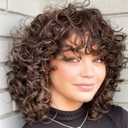

In [7]:
img.resize((128, 128))

In [8]:
np.array(img)

array([[[232, 231, 226],
        [232, 231, 226],
        [231, 230, 225],
        ...,
        [216, 212, 201],
        [216, 212, 201],
        [216, 212, 201]],

       [[233, 232, 227],
        [233, 232, 227],
        [231, 230, 225],
        ...,
        [215, 211, 200],
        [215, 211, 200],
        [215, 211, 200]],

       [[235, 235, 227],
        [234, 234, 226],
        [232, 232, 224],
        ...,
        [214, 210, 199],
        [214, 210, 199],
        [214, 210, 199]],

       ...,

       [[233, 237, 236],
        [232, 236, 235],
        [231, 235, 234],
        ...,
        [ 79,  68,  76],
        [ 82,  71,  79],
        [ 85,  74,  82]],

       [[233, 237, 236],
        [232, 236, 235],
        [231, 235, 234],
        ...,
        [ 79,  68,  76],
        [ 82,  71,  79],
        [ 85,  74,  82]],

       [[234, 238, 237],
        [233, 237, 236],
        [231, 235, 234],
        ...,
        [ 80,  69,  77],
        [ 82,  71,  79],
        [ 84,  73,  81]]

In [10]:
X = np.array(img)

In [12]:
X[0]

array([[232, 231, 226],
       [232, 231, 226],
       [231, 230, 225],
       ...,
       [216, 212, 201],
       [216, 212, 201],
       [216, 212, 201]], shape=(1302, 3), dtype=uint8)

#### Q1

For this homework we will use Convolutional Neural Network (CNN). We'll use PyTorch.

You need to develop the model with following structure:

- The shape for input should be (3, 200, 200) (channels first format in PyTorch)
- Next, create a convolutional layer (nn.Conv2d):
- Use 32 filters (output channels)
- Kernel size should be (3, 3) (that's the size of the filter), padding = 0, stride = 1
- Use 'relu' as activation
- Reduce the size of the feature map with max pooling (nn.MaxPool2d)
- Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using flatten or view
- Next, add a nn.Linear layer with 64 neurons and 'relu' activation
- Finally, create the nn.Linear layer with 1 neuron - this will be the output

- The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use torch.optim.SGD with the following parameters:
    - optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)

In [18]:
import torch
import torch.nn as nn

# Create the model using nn.Sequential
model = nn.Sequential(
    # Convolutional layer: 3 input channels -> 32 output channels
    # kernel_size=3, padding=0, stride=1
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=0, stride=1),
    nn.ReLU(),
    
    # Max pooling layer with 2x2 pooling size
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # Flatten the feature maps
    # After conv: (200-3+1) = 198x198
    # After maxpool: 198/2 = 99x99
    # Flattened size: 32 * 99 * 99 = 312,768
    nn.Flatten(),
    
    # Fully connected layer with 64 neurons and ReLU
    nn.Linear(32 * 99 * 99, 64),
    nn.ReLU(),
    
    # Output layer with 1 neuron and Sigmoid for binary classification
    nn.Linear(64, 1),
    nn.Sigmoid()
)

# Create the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)

# Print model summary
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

# Test with a sample input
sample_input = torch.randn(1, 3, 200, 200)
output = model(sample_input)
print(f"\nInput shape: {sample_input.shape}")
print(f"Output shape: {output.shape}")
print(f"Output value: {output.item():.4f}")

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=313632, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
  (7): Sigmoid()
)

Total parameters: 20073473

Input shape: torch.Size([1, 3, 200, 200])
Output shape: torch.Size([1, 1])
Output value: 0.4426


#### Q2

In [19]:
# Option 1: Using torchsummary (install with: pip install torchsummary)
from torchsummary import summary
summary(model, input_size=(3, 200, 200))

# Option 2: Manual counting
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 198, 198]             896
              ReLU-2         [-1, 32, 198, 198]               0
         MaxPool2d-3           [-1, 32, 99, 99]               0
           Flatten-4               [-1, 313632]               0
            Linear-5                   [-1, 64]      20,072,512
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
           Sigmoid-8                    [-1, 1]               0
Total params: 20,073,473
Trainable params: 20,073,473
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 23.93
Params size (MB): 76.57
Estimated Total Size (MB): 100.96
----------------------------------------------------------------
Total parameters: 20073473


In [22]:
import os
from torch.utils.data import Dataset
from PIL import Image

class HairStyleDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

#### Q3 + Q4

In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # ImageNet normalization
])

In [34]:
from torch.utils.data import DataLoader

train_dataset = HairStyleDataset(
    data_dir='./data/train/',
    transform=train_transforms
)

test_dataset = HairStyleDataset(
    data_dir='./data/test/',
    transform=train_transforms
)

In [35]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [36]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

criterion = nn.BCEWithLogitsLoss()

In [37]:
num_epochs = 10
history = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1) # Ensure labels are float and have shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For binary classification with BCEWithLogitsLoss, apply sigmoid to outputs before thresholding for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train
    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(test_dataset)
    val_epoch_acc = correct_val / total_val
    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 0.6749, Acc: 0.4869, Val Loss: 0.6576, Val Acc: 0.4876
Epoch 2/10, Loss: 0.6540, Acc: 0.4869, Val Loss: 0.6538, Val Acc: 0.4876
Epoch 3/10, Loss: 0.6424, Acc: 0.4869, Val Loss: 0.6572, Val Acc: 0.4876
Epoch 4/10, Loss: 0.6348, Acc: 0.4869, Val Loss: 0.6535, Val Acc: 0.4876
Epoch 5/10, Loss: 0.6334, Acc: 0.4869, Val Loss: 0.6598, Val Acc: 0.4876
Epoch 6/10, Loss: 0.6238, Acc: 0.4869, Val Loss: 0.6602, Val Acc: 0.4876
Epoch 7/10, Loss: 0.6203, Acc: 0.4869, Val Loss: 0.6543, Val Acc: 0.4876
Epoch 8/10, Loss: 0.6152, Acc: 0.4869, Val Loss: 0.6511, Val Acc: 0.4876
Epoch 9/10, Loss: 0.6257, Acc: 0.4869, Val Loss: 0.6722, Val Acc: 0.4876
Epoch 10/10, Loss: 0.6073, Acc: 0.4869, Val Loss: 0.6715, Val Acc: 0.4876


In [43]:
np.median(history['acc'])

np.float64(0.4868913857677903)

In [45]:
import numpy as np
print(np.median(history['acc']))
print(np.std(history['loss']))

0.4868913857677903
0.01888674516924444


#### Q5 + Q6

In [47]:
train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    transforms.RandomRotation(50),
    transforms.RandomResizedCrop(200, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(),
])

In [48]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [49]:
num_epochs = 10
history = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1) # Ensure labels are float and have shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For binary classification with BCEWithLogitsLoss, apply sigmoid to outputs before thresholding for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train
    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(test_dataset)
    val_epoch_acc = correct_val / total_val
    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 0.6126, Acc: 0.4869, Val Loss: 0.6900, Val Acc: 0.4876
Epoch 2/10, Loss: 0.6194, Acc: 0.4869, Val Loss: 0.6550, Val Acc: 0.4925
Epoch 3/10, Loss: 0.6025, Acc: 0.4881, Val Loss: 0.6510, Val Acc: 0.4925
Epoch 4/10, Loss: 0.5971, Acc: 0.4881, Val Loss: 0.6794, Val Acc: 0.4876
Epoch 5/10, Loss: 0.5931, Acc: 0.4869, Val Loss: 0.6753, Val Acc: 0.4876
Epoch 6/10, Loss: 0.5897, Acc: 0.4869, Val Loss: 0.6555, Val Acc: 0.4876
Epoch 7/10, Loss: 0.5864, Acc: 0.4869, Val Loss: 0.6480, Val Acc: 0.4876
Epoch 8/10, Loss: 0.5939, Acc: 0.4881, Val Loss: 0.6614, Val Acc: 0.4876
Epoch 9/10, Loss: 0.5772, Acc: 0.4881, Val Loss: 0.6602, Val Acc: 0.4876
Epoch 10/10, Loss: 0.5743, Acc: 0.4881, Val Loss: 0.6472, Val Acc: 0.4876


In [50]:
print(np.mean(history['val_loss']))
print(np.mean(history['val_acc'][:5]))

0.6622938318632134
0.48955223880597015
